<a href="https://colab.research.google.com/github/rjsdn2308/medical.data/blob/main/08_multi_layer_perceptron_and_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 멀티 퍼셉트론 모델

## mnist 데이터셋 불러오기

In [28]:
# mnist 데이터셋 활용해서 멀티 퍼셉트론 모델 만들기
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [29]:
x_train.shape

(60000, 28, 28)

In [30]:
y_train.shape

(60000,)

In [31]:
x_test.shape

(10000, 28, 28)

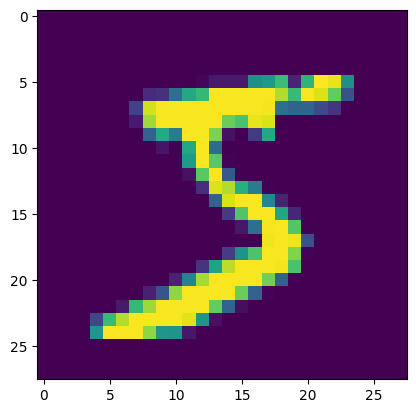

In [32]:
# 손글씨 이미지 출력
import matplotlib.pyplot as plt
plt.imshow(x_train[0])

In [33]:
x_train.min(), x_train.max()

(np.uint8(0), np.uint8(255))

In [34]:
# 0~1값을 가질 때 딥러닝이 잘 동작하기 떄문에 표준화 진행
x_train = x_train/255
x_test = x_test/255

In [35]:
# 0~9까지의 y값 존재
y_train.min(), y_train.max()

(np.uint8(0), np.uint8(9))

In [36]:
# y값이 범주형이므로 원핫 인코딩 진행
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [37]:
# 멀티 퍼셉트론 모델 생성
from keras.models import Sequential
from keras.layers import Dense, Flatten
model = Sequential()
model.add(Flatten(input_shape=(28,28))) # 2차원을 1차원으로 변환
model.add(Dense(10, activation='softmax')) # 1차원입력을 10개로 분류

In [38]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [39]:
history = model.fit(x_train, y_train, epochs=10, batch_size=128, verbose=1) # vervose : 정보를 상세히 출력, epoch, batch_size ppt 참고

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7191 - loss: 1.0575
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8970 - loss: 0.3810
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9104 - loss: 0.3230
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9163 - loss: 0.3047
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9186 - loss: 0.2911
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9224 - loss: 0.2788
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9226 - loss: 0.2722
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9251 - loss: 0.2726
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9266 - loss: 0.2643
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9275 - loss: 0.2590


In [40]:
model.evaluate(x_test, y_test, verbose=0) # loss, accuracy

[0.26668769121170044, 0.9254000186920166]

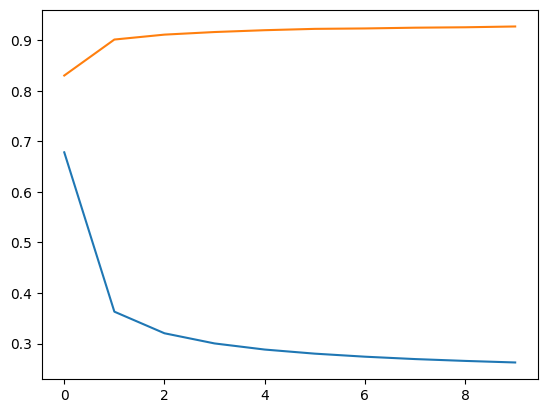

In [41]:
# plot을 통해 model의 loss, accuracy 변화 그리기
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])

In [42]:
# 더 좋은 성능을 위해 100개씩의 은닉값을 가진 은닉층 2개 추가
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [43]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [44]:
# vervose : 정보를 상세히 출력, epoch, batch_size ppt 참고
history = model.fit(x_train, y_train, epochs=10, batch_size=128, verbose=1, validation_data=(x_test, y_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8159 - loss: 0.6365 - val_accuracy: 0.9508 - val_loss: 0.1712
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9549 - loss: 0.1562 - val_accuracy: 0.9625 - val_loss: 0.1251
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9671 - loss: 0.1080 - val_accuracy: 0.9683 - val_loss: 0.1030
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9767 - loss: 0.0743 - val_accuracy: 0.9699 - val_loss: 0.0923
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9823 - loss: 0.0609 - val_accuracy: 0.9736 - val_loss: 0.0873
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9847 - loss: 0.0486 - val_accuracy: 0.9696 - val_loss: 0.1001
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9873 - loss: 0.0421 - val_accuracy: 0.9757 - val_loss: 0.0786
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9911 - loss: 0.0323 - val_accuracy: 0.

In [45]:
model.evaluate(x_test, y_test, verbose=0)

[0.08802099525928497, 0.9739999771118164]

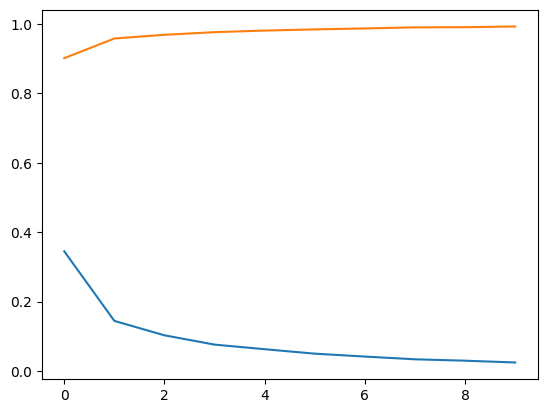

In [46]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])

습 1 : 위 학습 결과를 해석해보세요. 그리고 그 근거를 찾아보세요.
 - 결과로는 정확도가 향상되었고 과대적합 경향이 있고 기본 MLP보다 좋은 성능을 보여주고 있습니다. 과대적합 경향이 있다고 보는 이유는 학습 정확도는 99.3%까지 상승했지만 좀 더 좋은 성능을 가진 MLP는 97.5%까지 떨어져 정체가 됩니다. 그래서 과대적합 가능성이 있습니다.

# CNN

In [47]:
# CNN에 필요한 레이어 추가
from keras.layers import Conv2D, MaxPooling2D

In [48]:
# 모델 생성
conv_model = Sequential()
conv_model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
conv_model.add(MaxPooling2D(pool_size=(2,2)))

In [49]:
# convolution layer, max pooling layer 추가
conv_model.add(Conv2D(15, (3,3), activation='relu'))
conv_model.add(MaxPooling2D(pool_size=(2,2)))

In [50]:
# flatten and classification
conv_model.add(Flatten())
conv_model.add(Dense(64, activation='relu'))
conv_model.add(Dense(10, activation='softmax'))

In [51]:
# compile
conv_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [52]:
# 모델 학습
conv_history = conv_model.fit(x_train, y_train, epochs=10, batch_size=128, verbose=1, validation_data=(x_test, y_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 39s 77ms/step - accuracy: 0.7896 - loss: 0.7197 - val_accuracy: 0.9700 - val_loss: 0.0987
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 36s 76ms/step - accuracy: 0.9710 - loss: 0.0982 - val_accuracy: 0.9810 - val_loss: 0.0561
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 78ms/step - accuracy: 0.9810 - loss: 0.0631 - val_accuracy: 0.9822 - val_loss: 0.0511
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 39s 74ms/step - accuracy: 0.9861 - loss: 0.0477 - val_accuracy: 0.9867 - val_loss: 0.0411
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 75ms/step - accuracy: 0.9880 - loss: 0.0391 - val_accuracy: 0.9882 - val_loss: 0.0359
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 72ms/step - accuracy: 0.9896 - loss: 0.0335 - val_accuracy: 0.9877 - val_loss: 0.0357
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 74ms/step - accuracy: 0.9914 - loss: 0.0288 - val_accuracy: 0.9874 - val_loss: 0.0379
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 72ms/step - accuracy: 0.9913 - loss: 0.0272 - 

In [53]:
conv_model.evaluate(x_test, y_test, verbose=0)

[0.028011050075292587, 0.9905999898910522]

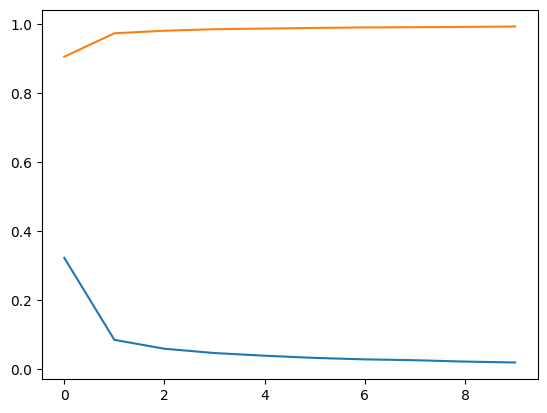

In [54]:
plt.plot(conv_history.history['loss'])
plt.plot(conv_history.history['accuracy'])

실습 2 : 위 학습 결과를 해석해보세요. 그리고 그 근거를 찾아보세요.
- 결과적으로는 CNN 모델은 정확도가 향상되었고 과대적합도 없습니다. MNIST처럼 이미지 특성이 뚜렷한 데이테에서는 CNN이 더 성능이 높습니다.  